In [3]:
import importlib
import sys
sys.path.append('../src')

import qa
importlib.reload(qa)
import qa

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [ ]:
# from datasets import load_dataset

# ds = load_dataset("TIGER-Lab/MMLU-Pro")

# mmlu = {}
# for ele in ds['test']:
#     if ele['category'] not in mmlu:
#         mmlu[ele['category']] = []
#     mmlu[ele['category']].append(ele)

# import random

# mmlu_samples = []
# for cat in mmlu:
#     mmlu_samples.extend(random.Random(0).sample(mmlu[cat], 10))

# with open('../data/mmlu_samples_140.pkl', 'wb') as f:
#     pickle.dump(mmlu_samples, f)

# with open('../data/mmlu_samples_140.pkl', 'rb') as f:
#     mmlu_samples = pickle.load(f)

In [ ]:
oqa_df = pd.DataFrame()
# get all file names under PATH
import os
PATH = '../data/OpinionQA/model_input/'
for file in os.listdir(PATH):
    if re.match(r'.+W\d{2}\.csv', file):
        target_df = pd.read_csv(PATH + file)
        target_df = target_df[[""]]
        oqa_df = pd.concat([oqa_df, target_df], ignore_index=True)
oqa_df

ParserError: Error tokenizing data. C error: Expected 7 fields in line 24, saw 8


In [ ]:
with open('../data/res_mmlu_org.pkl', 'rb') as f:
    res_mmlu_org = pickle.load(f)


input_feat_list = []
for group_size in [4,12,50,100,1000]: # row
    input_row = []
    for agree_ratio in [0, 0.25, 0.50, 0.75, 1]: # column
        
        eval_feat = {
            'type': 'grp_ratio',
            'group_size': group_size,
            'disagree_ratio': 1-agree_ratio,
            'disagree_type': '2nd',
        }
        input_row.append(eval_feat)
    input_feat_list.append(input_row)

results, accuracy = qa.mmlu_eval_matrix(res_mmlu_org, input_feat_list)
    #     result, accuracy = qa.mmlu_eval_matrix(res_mmlu_org, eval_feat)
    #     output_row.append(accuracy)
    # output_list.append(output_row)

# round a 2d np array
accuracy = np.array([[round(ele,2) for ele in row] for row in accuracy])



Processing grp_ratio samples...


Processing MMLU: 100%|██████████| 3500/3500 [01:16<00:00, 45.73it/s]


TypeError: type numpy.ndarray doesn't define __round__ method

In [ ]:
with open('../data/res_mmlu_org.pkl', 'rb') as f:
    res_mmlu_org = pickle.load(f)


input_feat_list = []
for disagree_size in range(11): # row
    input_row = []
    for agree_size in range(11): # column
        
        eval_feat = {
            'type': 'grp_count',
            'agree_size': agree_size,
            'disagree_size': disagree_size,
            'disagree_type': '2nd',
        }
        input_row.append(eval_feat)
    input_feat_list.append(input_row)

results, accuracy = qa.mmlu_eval_matrix(res_mmlu_org, input_feat_list)
    #     result, accuracy = qa.mmlu_eval_matrix(res_mmlu_org, eval_feat)
    #     output_row.append(accuracy)
    # output_list.append(output_row)

# round a 2d np array
accuracy = np.array([[round(ele,2) for ele in row] for row in accuracy])



Processing grp_count samples...


Processing MMLU: 100%|██████████| 16940/16940 [05:33<00:00, 50.79it/s]


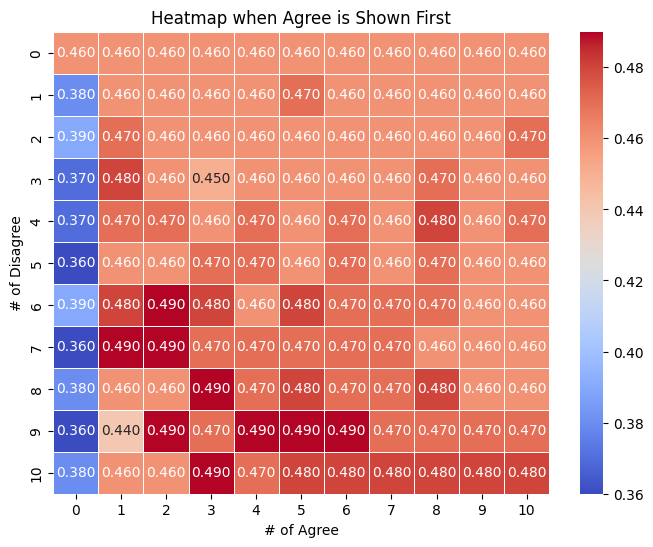

In [ ]:
# Define the data
data = np.array(accuracy)

# Define row and column labels
row_labels = [str(x) for x in range(11)]
col_labels = [str(x) for x in range(11)]

# Create DataFrame
df = pd.DataFrame(data, index=row_labels, columns=col_labels)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df, annot=True, cmap="coolwarm", fmt=".3f", linewidths=0.5)
plt.xlabel("# of Agree")
plt.ylabel("# of Disagree")
plt.title("Heatmap when Agree is Shown First")
plt.show()

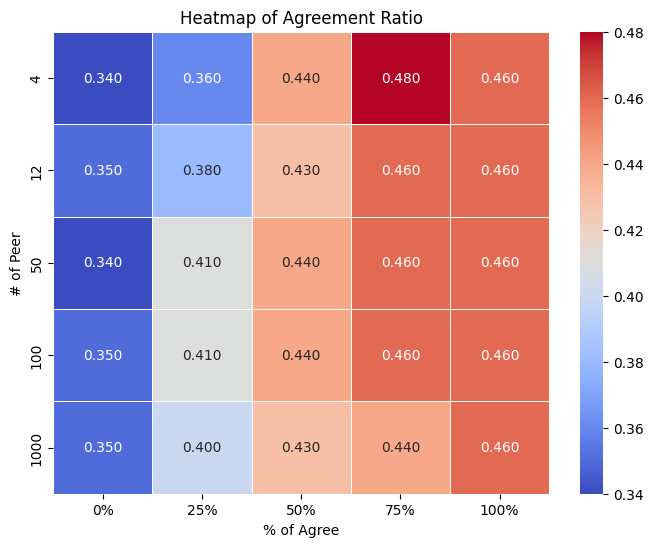

In [ ]:
# Define the data
data = np.array(accuracy)

# Define row and column labels
row_labels = [4,12,50,100,1000]
col_labels = ['0%', '25%', '50%', '75%', '100%']

# Create DataFrame
df = pd.DataFrame(data, index=row_labels, columns=col_labels)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df, annot=True, cmap="coolwarm", fmt=".3f", linewidths=0.5)
plt.xlabel("% of Agree")
plt.ylabel("# of Peer")
plt.title("Heatmap of Agreement Ratio")
plt.show()